## Actividad 01 - EDA Proyecto de Python
#### Oscar Alejandro Duarte Bonilla

### Acerca del dataset

#### Habitos estudiantiles y el rendimiento académico
El dataset seleccionado está enmarcado en el rendimiento académico de estudiantes y la influencia de los hábitos y otras variables propias del día a día del estudiante. 
#### Objetivo
Conocer como se relacionan cada una de las variables y cuales marcan una diferencia notable en el rendimiento académico es el objetivo de este análisis exploratorio, esto nos permitirá identificar si existe una correlación directa con el bajo desempeño estudiantil.

### 1. Requerimientos

In [228]:
import matplotlib.pyplot as plt
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [229]:
# ============================================================
# Configuración inicial: librerías, advertencias y estilos
# ============================================================

# Filtrado de advertencias
import warnings
warnings.filterwarnings('ignore')  # Oculta mensajes de advertencia durante la ejecución

# Importación de librerías para análisis y visualización
import numpy as np                      # Operaciones numéricas y manejo de arrays
import pandas as pd                    # Manipulación de datos con DataFrames
import seaborn as sns                  # Visualización estadística basada en matplotlib
import matplotlib.pyplot as plt        # Gráficos estáticos
#from plotly.subplots import make_subplots  # Subgráficos interactivos con Plotly
#import plotly.graph_objects as go      # Gráficos interactivos personalizados con Plotly

# Configuración de pandas para mostrar más columnas en pantalla
pd.set_option('display.max_columns', 300)  # Muestra hasta 300 columnas al imprimir un DataFrame

# Estilo visual para matplotlib
plt.style.use('seaborn-v0_8-pastel')  #

### 2. Carga del dataset

In [230]:
df = pd.read_csv("student_habits_performance.csv")

#### 2.1 Inspección del DataFrame

In [231]:
df.head()

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


In [232]:
df.tail()

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
995,S1995,21,Female,2.6,0.5,1.6,No,77.0,7.5,Fair,2,High School,Good,6,Yes,76.1
996,S1996,17,Female,2.9,1.0,2.4,Yes,86.0,6.8,Poor,1,High School,Average,6,Yes,65.9
997,S1997,20,Male,3.0,2.6,1.3,No,61.9,6.5,Good,5,Bachelor,Good,9,Yes,64.4
998,S1998,24,Male,5.4,4.1,1.1,Yes,100.0,7.6,Fair,0,Bachelor,Average,1,No,69.7
999,S1999,19,Female,4.3,2.9,1.9,No,89.4,7.1,Good,2,Bachelor,Average,8,No,74.9


In [233]:
#Total de Filas y columnas
df.shape

(1000, 16)

In [234]:
#Tipos de datos
df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       909 non-null    object 
 12  internet_quality               1000 non-null   ob

In [235]:
#Analizando columnas numericas
df_numeric=df.select_dtypes(include=['number'])

In [236]:
df_numeric.describe()
#Las edades están comprendidas entre 17 y 24 años, el 75% de los estudiantes duerme menos de 8 horas, no hay valore negativos

,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score
count,1000.0000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.4980,3.55010,2.505500,1.819700,84.131700,6.470100,3.042000,5.438000,69.601500
std,2.3081,1.46889,1.172422,1.075118,9.399246,1.226377,2.025423,2.847501,16.888564
min,17.0000,0.00000,0.000000,0.000000,56.000000,3.200000,0.000000,1.000000,18.400000
25%,18.7500,2.60000,1.700000,1.000000,78.000000,5.600000,1.000000,3.000000,58.475000
50%,20.0000,3.50000,2.500000,1.800000,84.400000,6.500000,3.000000,5.000000,70.500000
75%,23.0000,4.50000,3.300000,2.525000,91.025000,7.300000,5.000000,8.000000,81.325000
max,24.0000,8.30000,7.200000,5.400000,100.000000,10.000000,6.000000,10.000000,100.000000


In [237]:
df.nunique()

student_id                       1000
age                                 8
gender                              3
study_hours_per_day                78
social_media_hours                 60
netflix_hours                      51
part_time_job                       2
attendance_percentage             320
sleep_hours                        68
diet_quality                        3
exercise_frequency                  7
parental_education_level            3
internet_quality                    3
mental_health_rating               10
extracurricular_participation       2
exam_score                        480
dtype: int64

In [238]:
df.duplicated().sum()
#no existen regsitros duplicados

np.int64(0)

In [239]:
df.isnull().sum()
#el campo parental_education_level tiene 91 valores nulos de los 1000 registros(representan el 9.1% de los registros)

student_id                        0
age                               0
gender                            0
study_hours_per_day               0
social_media_hours                0
netflix_hours                     0
part_time_job                     0
attendance_percentage             0
sleep_hours                       0
diet_quality                      0
exercise_frequency                0
parental_education_level         91
internet_quality                  0
mental_health_rating              0
extracurricular_participation     0
exam_score                        0
dtype: int64

#### 2.2 Limpieza del DataFrame y manejo de valores faltantes
##### VALORES NULOS
parental_education_level es una columna categorica con 3 valores diferentes que no son nulos, sustituirlo con la moda más repetida


In [240]:
#parental_education_level es una columna categorica y que tiene 91 valores nulos
df.parental_education_level.value_counts()

parental_education_level
High School    392
Bachelor       350
Master         167
Name: count, dtype: int64

In [241]:
#91 registros con valor parental_education_level, asignar la moda
df.parental_education_level.fillna(df.parental_education_level.mode()[0],inplace = True) 

##### VALORES DESCONOCIDOS
la variable gender a pesar de tener 3 valores diferentes no constituyen valores desconocidos(XNA)

In [242]:
df.gender.value_counts()

gender
Female    481
Male      477
Other      42
Name: count, dtype: int64

##### MANEJO DE TIPOS DE DATOS
Cambiando Yes o No por 1 o 0 para las columnas

In [243]:
df['part_time_job'] = np.where(df['part_time_job']=='Yes', 1 , 0)
df['extracurricular_participation'] = np.where(df['extracurricular_participation']=='Yes', 1 , 0)

In [244]:
df[['part_time_job','extracurricular_participation']].head()

,part_time_job,extracurricular_participation
0,0,1
1,0,0
2,0,0
3,0,1
4,0,0


#### 2.3 Agrupamiento (Binning) de variables continuas
**attendance_percentage_scale:** nueva columna donde colocaremos la escala de asistencia [Ausentismo, Asistencia Irregular, Asistencia Regular] según el valor de attendance_percentage, con pd.cut() dividiremos los datos en bins según los rangos [0,80,90,100], así convertiremos la variable continua a categoria<br>
**mental_health_rating_Scale:** nueva columna donde colocaremos la escala de salud mental [Mild, Moderate, Severe] según el valor de mental_health_rating, con pd.cut() dividiremos los datos en bin según los rango q=[1,3,6,10], así convertiremos la variable continua a categoria

In [245]:
df['attendance_percentage_scale'] = pd.cut(df.attendance_percentage, bins=[0, 80, 90, 100], labels=["Ausentismo", "Asistencia Irregular", "Asistencia Regular"])
print(df[['attendance_percentage', 'attendance_percentage_scale']])

     attendance_percentage attendance_percentage_scale
0                     85.0        Asistencia Irregular
1                     97.3          Asistencia Regular
2                     94.8          Asistencia Regular
3                     71.0                  Ausentismo
4                     90.9          Asistencia Regular
..                     ...                         ...
995                   77.0                  Ausentismo
996                   86.0        Asistencia Irregular
997                   61.9                  Ausentismo
998                  100.0          Asistencia Regular
999                   89.4        Asistencia Irregular

[1000 rows x 2 columns]


In [246]:
df['mental_health_rating_scale'] = pd.cut(df.mental_health_rating, bins=[0, 2, 4, 6, 8, 10], labels=["En crisis", "Luchando", "Sobreviviendo","Prosperando","Excelente"])
print(df[['mental_health_rating', 'mental_health_rating_scale']])

     mental_health_rating mental_health_rating_scale
0                       8                Prosperando
1                       8                Prosperando
2                       1                  En crisis
3                       1                  En crisis
4                       1                  En crisis
..                    ...                        ...
995                     6              Sobreviviendo
996                     6              Sobreviviendo
997                     9                  Excelente
998                     1                  En crisis
999                     8                Prosperando

[1000 rows x 2 columns]


In [247]:
#Definiendo valor target APROBO>=70 o REPROBADO<70
df['exam_result'] = pd.cut(df.exam_score, bins=[0, 70, 100], labels=["Reprobado", "Aprobado"])
print(df[['exam_result', 'exam_score']])

    exam_result  exam_score
0     Reprobado        56.2
1      Aprobado       100.0
2     Reprobado        34.3
3     Reprobado        26.8
4     Reprobado        66.4
..          ...         ...
995    Aprobado        76.1
996   Reprobado        65.9
997   Reprobado        64.4
998   Reprobado        69.7
999    Aprobado        74.9

[1000 rows x 2 columns]


### 3. Análisis

#### 3.1 Convertir variables numericas categoricas a string categoricas


In [248]:
df['gender'] = df['gender'].astype('category')
df['diet_quality'] = df['diet_quality'].astype('category')
df['parental_education_level'] = df['parental_education_level'].astype('category')
df['internet_quality'] = df['internet_quality'].astype('category')

In [249]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   student_id                     1000 non-null   object  
 1   age                            1000 non-null   int64   
 2   gender                         1000 non-null   category
 3   study_hours_per_day            1000 non-null   float64 
 4   social_media_hours             1000 non-null   float64 
 5   netflix_hours                  1000 non-null   float64 
 6   part_time_job                  1000 non-null   int64   
 7   attendance_percentage          1000 non-null   float64 
 8   sleep_hours                    1000 non-null   float64 
 9   diet_quality                   1000 non-null   category
 10  exercise_frequency             1000 non-null   int64   
 11  parental_education_level       1000 non-null   category
 12  internet_quality               1000

#### 3.2 Visualizaciones

In [250]:
numerical_col = df.select_dtypes(include='number').columns
len(numerical_col)

11

##### Boxplot de variables numericas

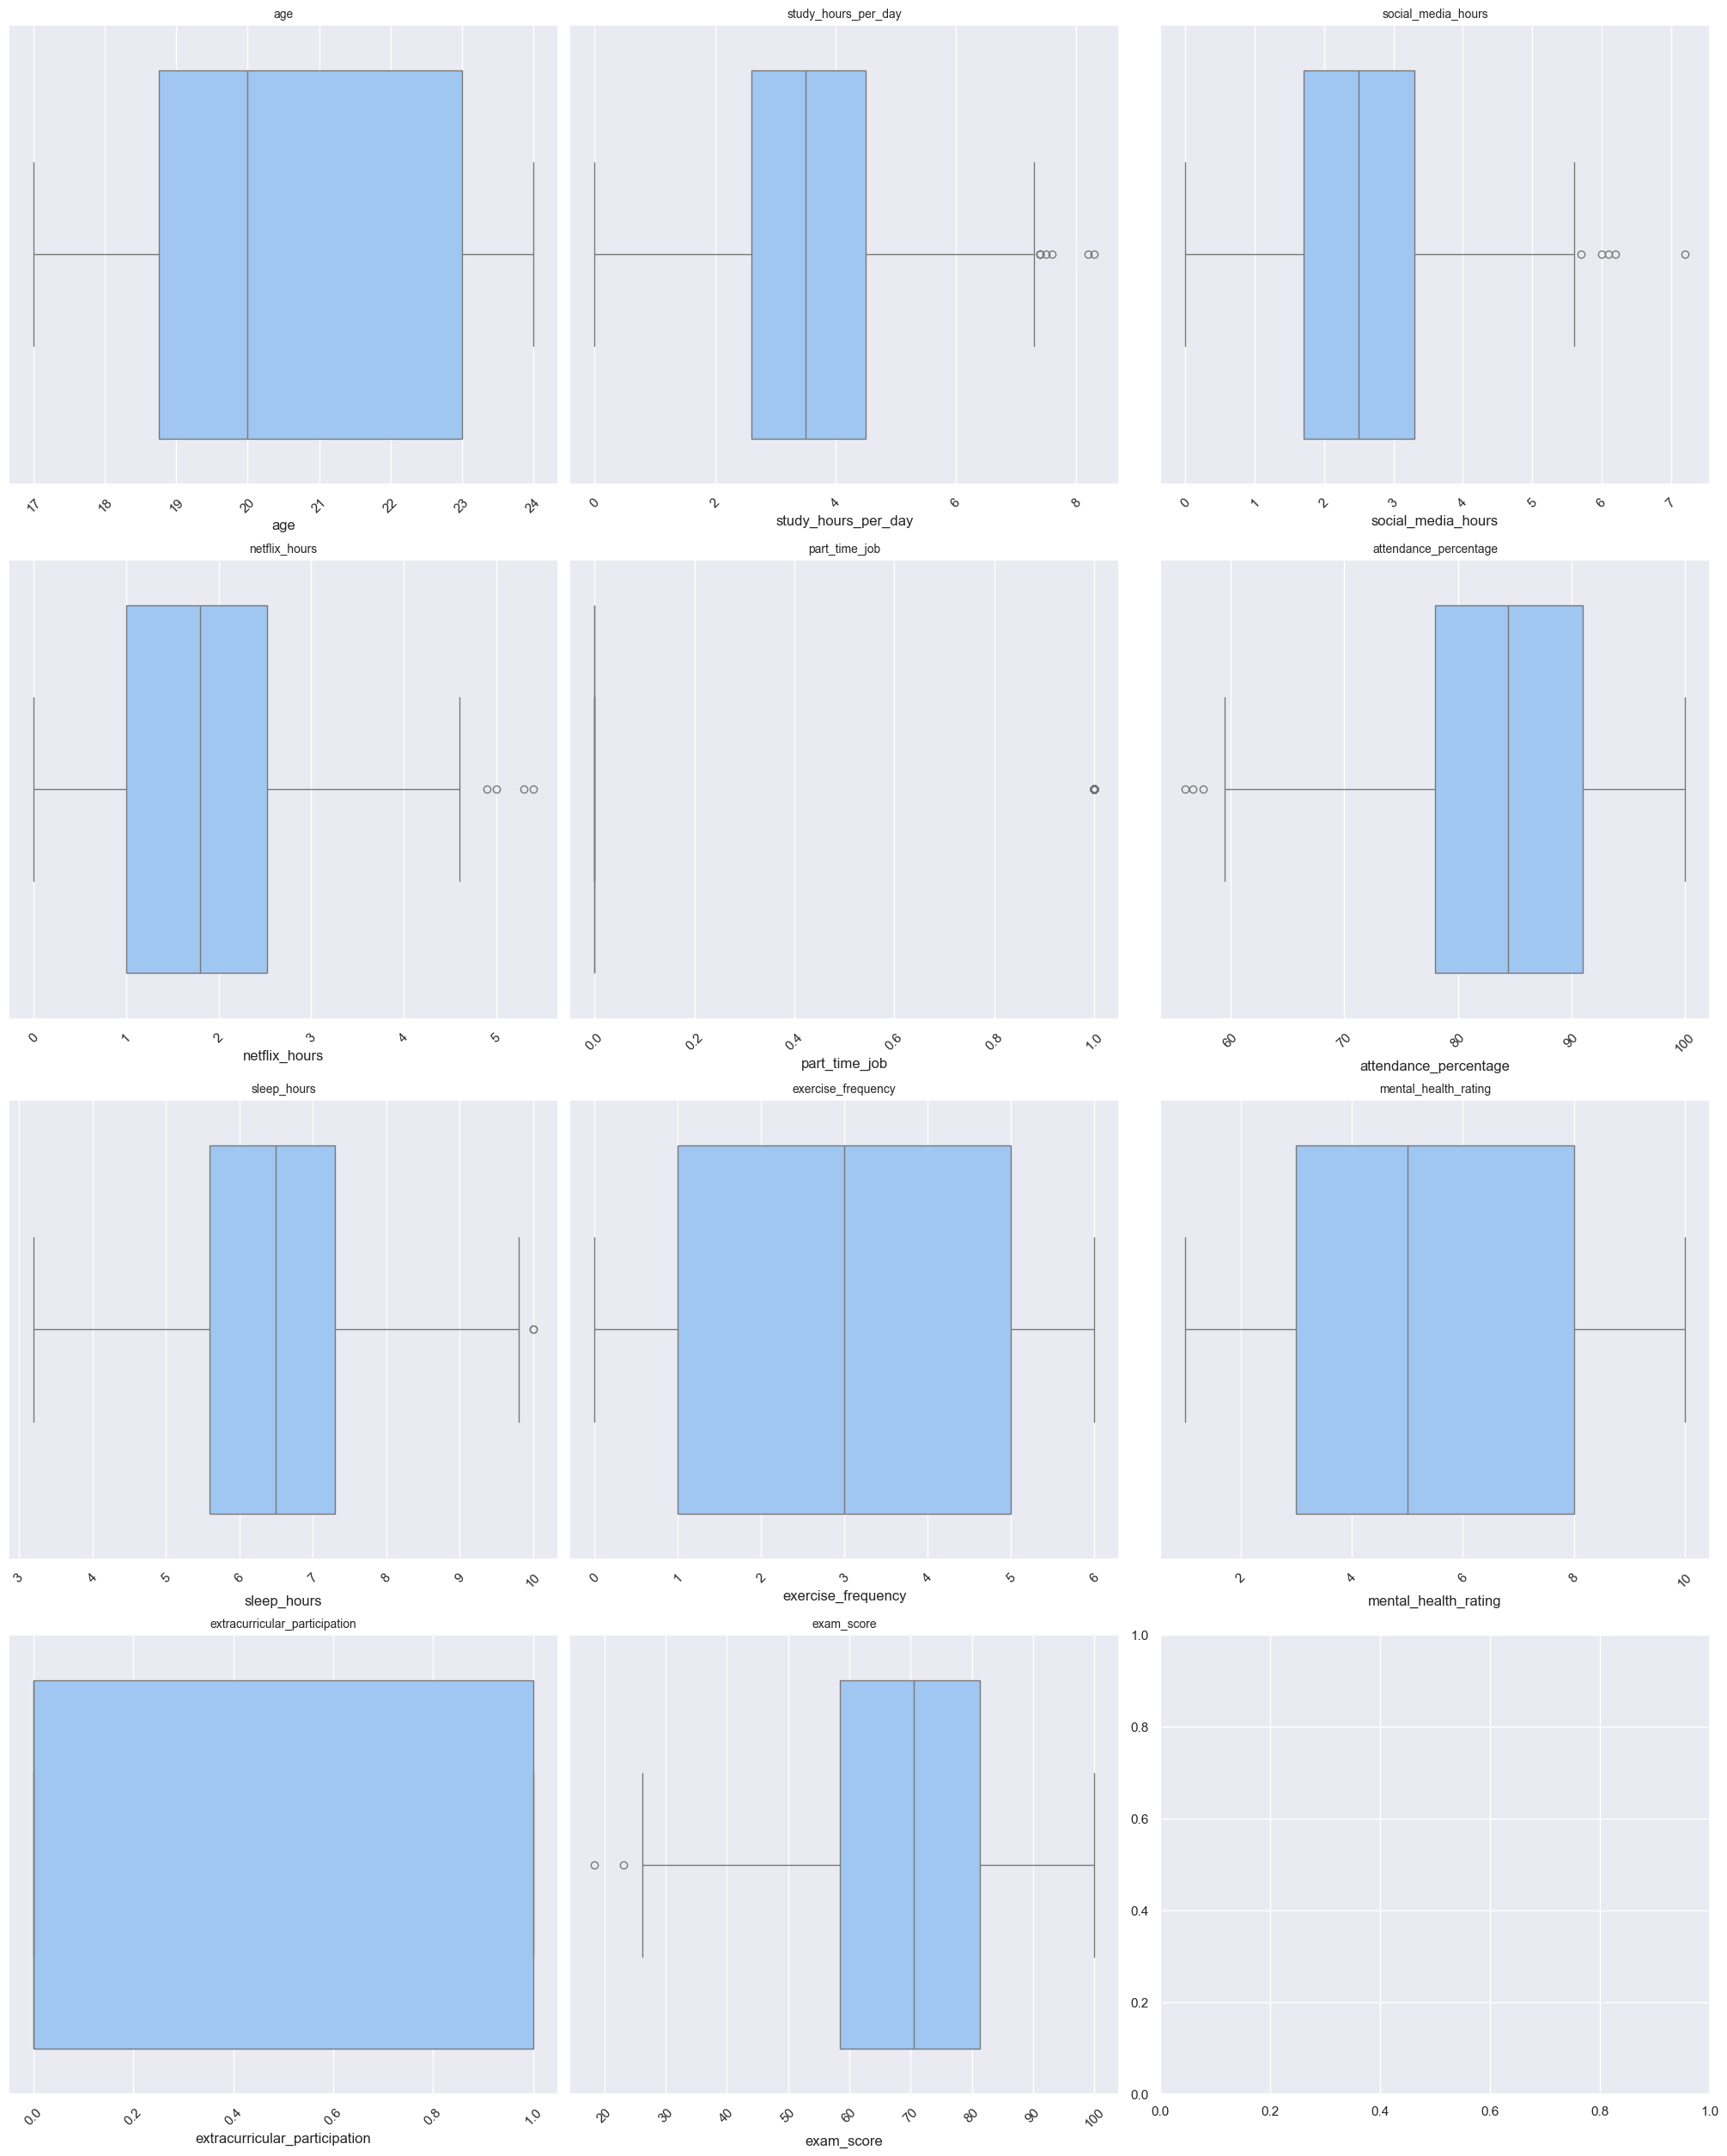

In [251]:
# Ajustar tamaño total de la figura
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(20, 25), constrained_layout=True)

# Ajustar márgenes y espaciado interno
fig.subplots_adjust(left=0.05, bottom=0.05, right=0.95, top=0.95, wspace=0.3, hspace=0.5)

# Dibujar boxplots y mejorar visibilidad
for ax, column in zip(axes.flatten(), numerical_col):
    sns.boxplot(data=df, x=column, ax=ax)
    ax.set_title(column, fontsize=10)
    ax.tick_params(axis='x', labelrotation=45)  # Rotar etiquetas si fueran categóricas

# Mostrar la figura
plt.show()

In [252]:
#Se logran visualizar outliers en las variables de uso de redes sociales y netflix

##### Relaciones variables continuas

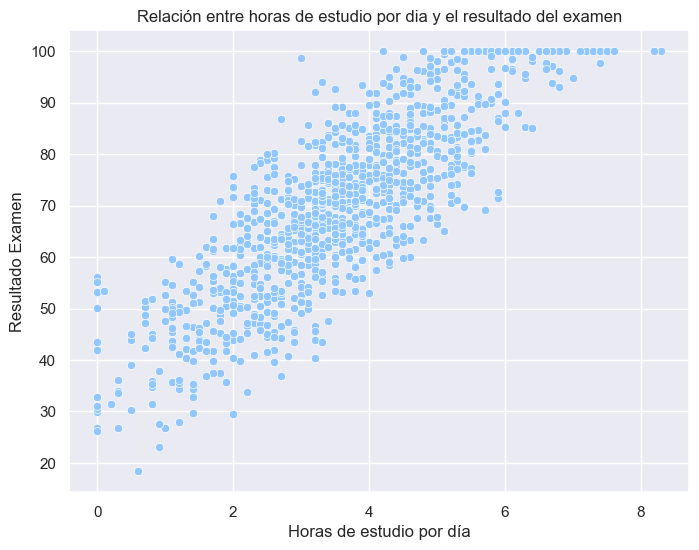

In [253]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='study_hours_per_day', y='exam_score')
plt.title('Relación entre horas de estudio por dia y el resultado del examen')
plt.xlabel('Horas de estudio por día')
plt.ylabel('Resultado Examen')
plt.grid(True)
plt.show()

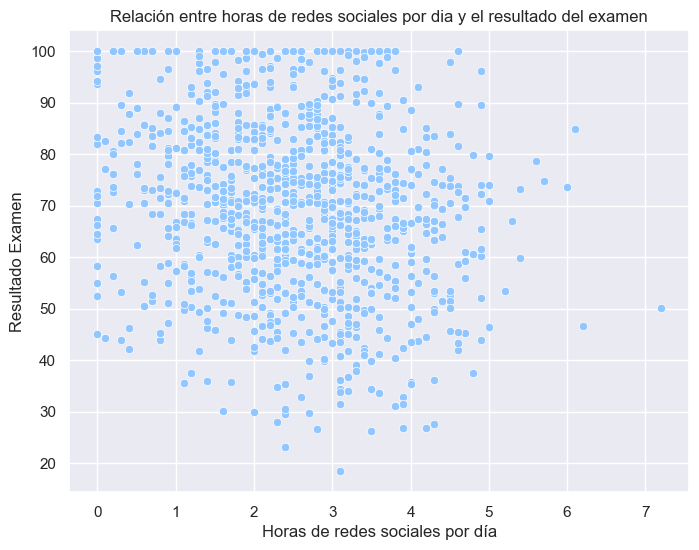

In [254]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='social_media_hours', y='exam_score')
plt.title('Relación entre horas de redes sociales por dia y el resultado del examen')
plt.xlabel('Horas de redes sociales por día')
plt.ylabel('Resultado Examen')
plt.grid(True)
plt.show()

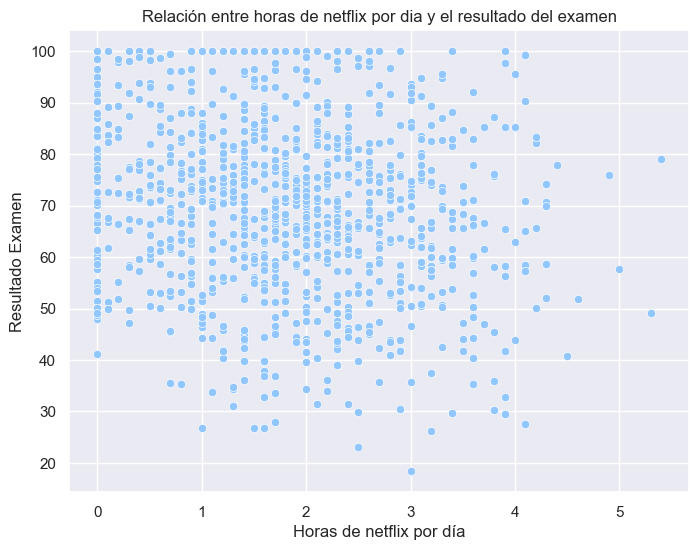

In [255]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='netflix_hours', y='exam_score')
plt.title('Relación entre horas de netflix por dia y el resultado del examen')
plt.xlabel('Horas de netflix por día')
plt.ylabel('Resultado Examen')
plt.grid(True)
plt.show()

##### Mapa de calor

In [256]:
df_num = df.select_dtypes(include='number')

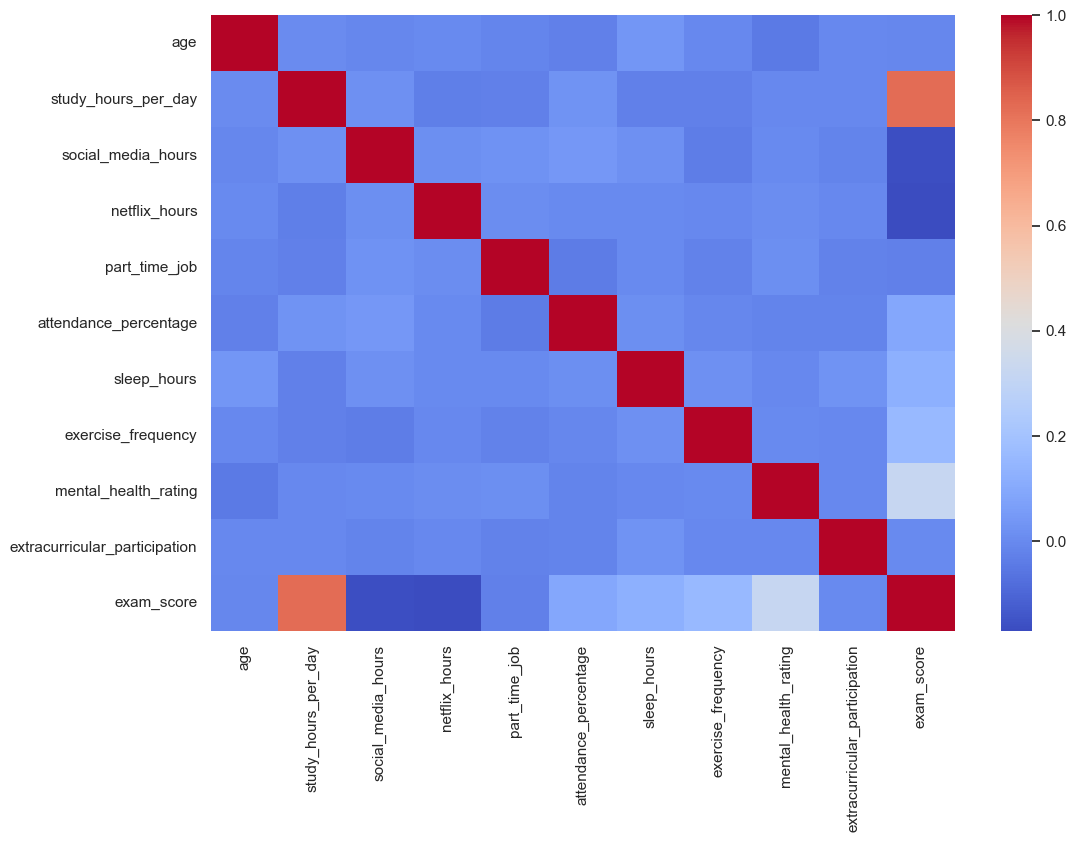

In [257]:
plt.figure(figsize=(12,8))
sns.heatmap(df_num.corr(), annot=False, cmap='coolwarm')
plt.show()

##### Distribucion segmentada

In [258]:
corr0 = df[df['exam_result'] == "Reprobado"].select_dtypes(include='number')
corr1 = df[df['exam_result'] == "Aprobado"].select_dtypes(include='number')

In [259]:
df.exam_result.value_counts(normalize=True) * 100

exam_result
Aprobado     51.0
Reprobado    49.0
Name: proportion, dtype: float64

In [260]:
def uni(col):
    sns.set(style="darkgrid")
    plt.figure(figsize=(40,20))
    
   
    plt.subplot(1,2,1)                                   
    sns.distplot(corr0[col], color="r" )
    plt.yscale('linear') 
    plt.xlabel(col, fontsize= 30, fontweight="bold")
    plt.ylabel('Reprobados', fontsize= 30, fontweight="bold")                    #Target 0
    plt.xticks(rotation=90, fontsize=30)
    plt.yticks(rotation=360, fontsize=30)
     
    
    
    
    plt.subplot(1,2,2)                                                                                                      
    sns.distplot(corr1[col], color="g")
    plt.yscale('linear')    
    plt.xlabel(col, fontsize= 30, fontweight="bold")
    plt.ylabel('Aprobados', fontsize= 30, fontweight="bold")                       # Target 1
    plt.xticks(rotation=90, fontsize=30)
    plt.yticks(rotation=360, fontsize=30)
    
    plt.show();

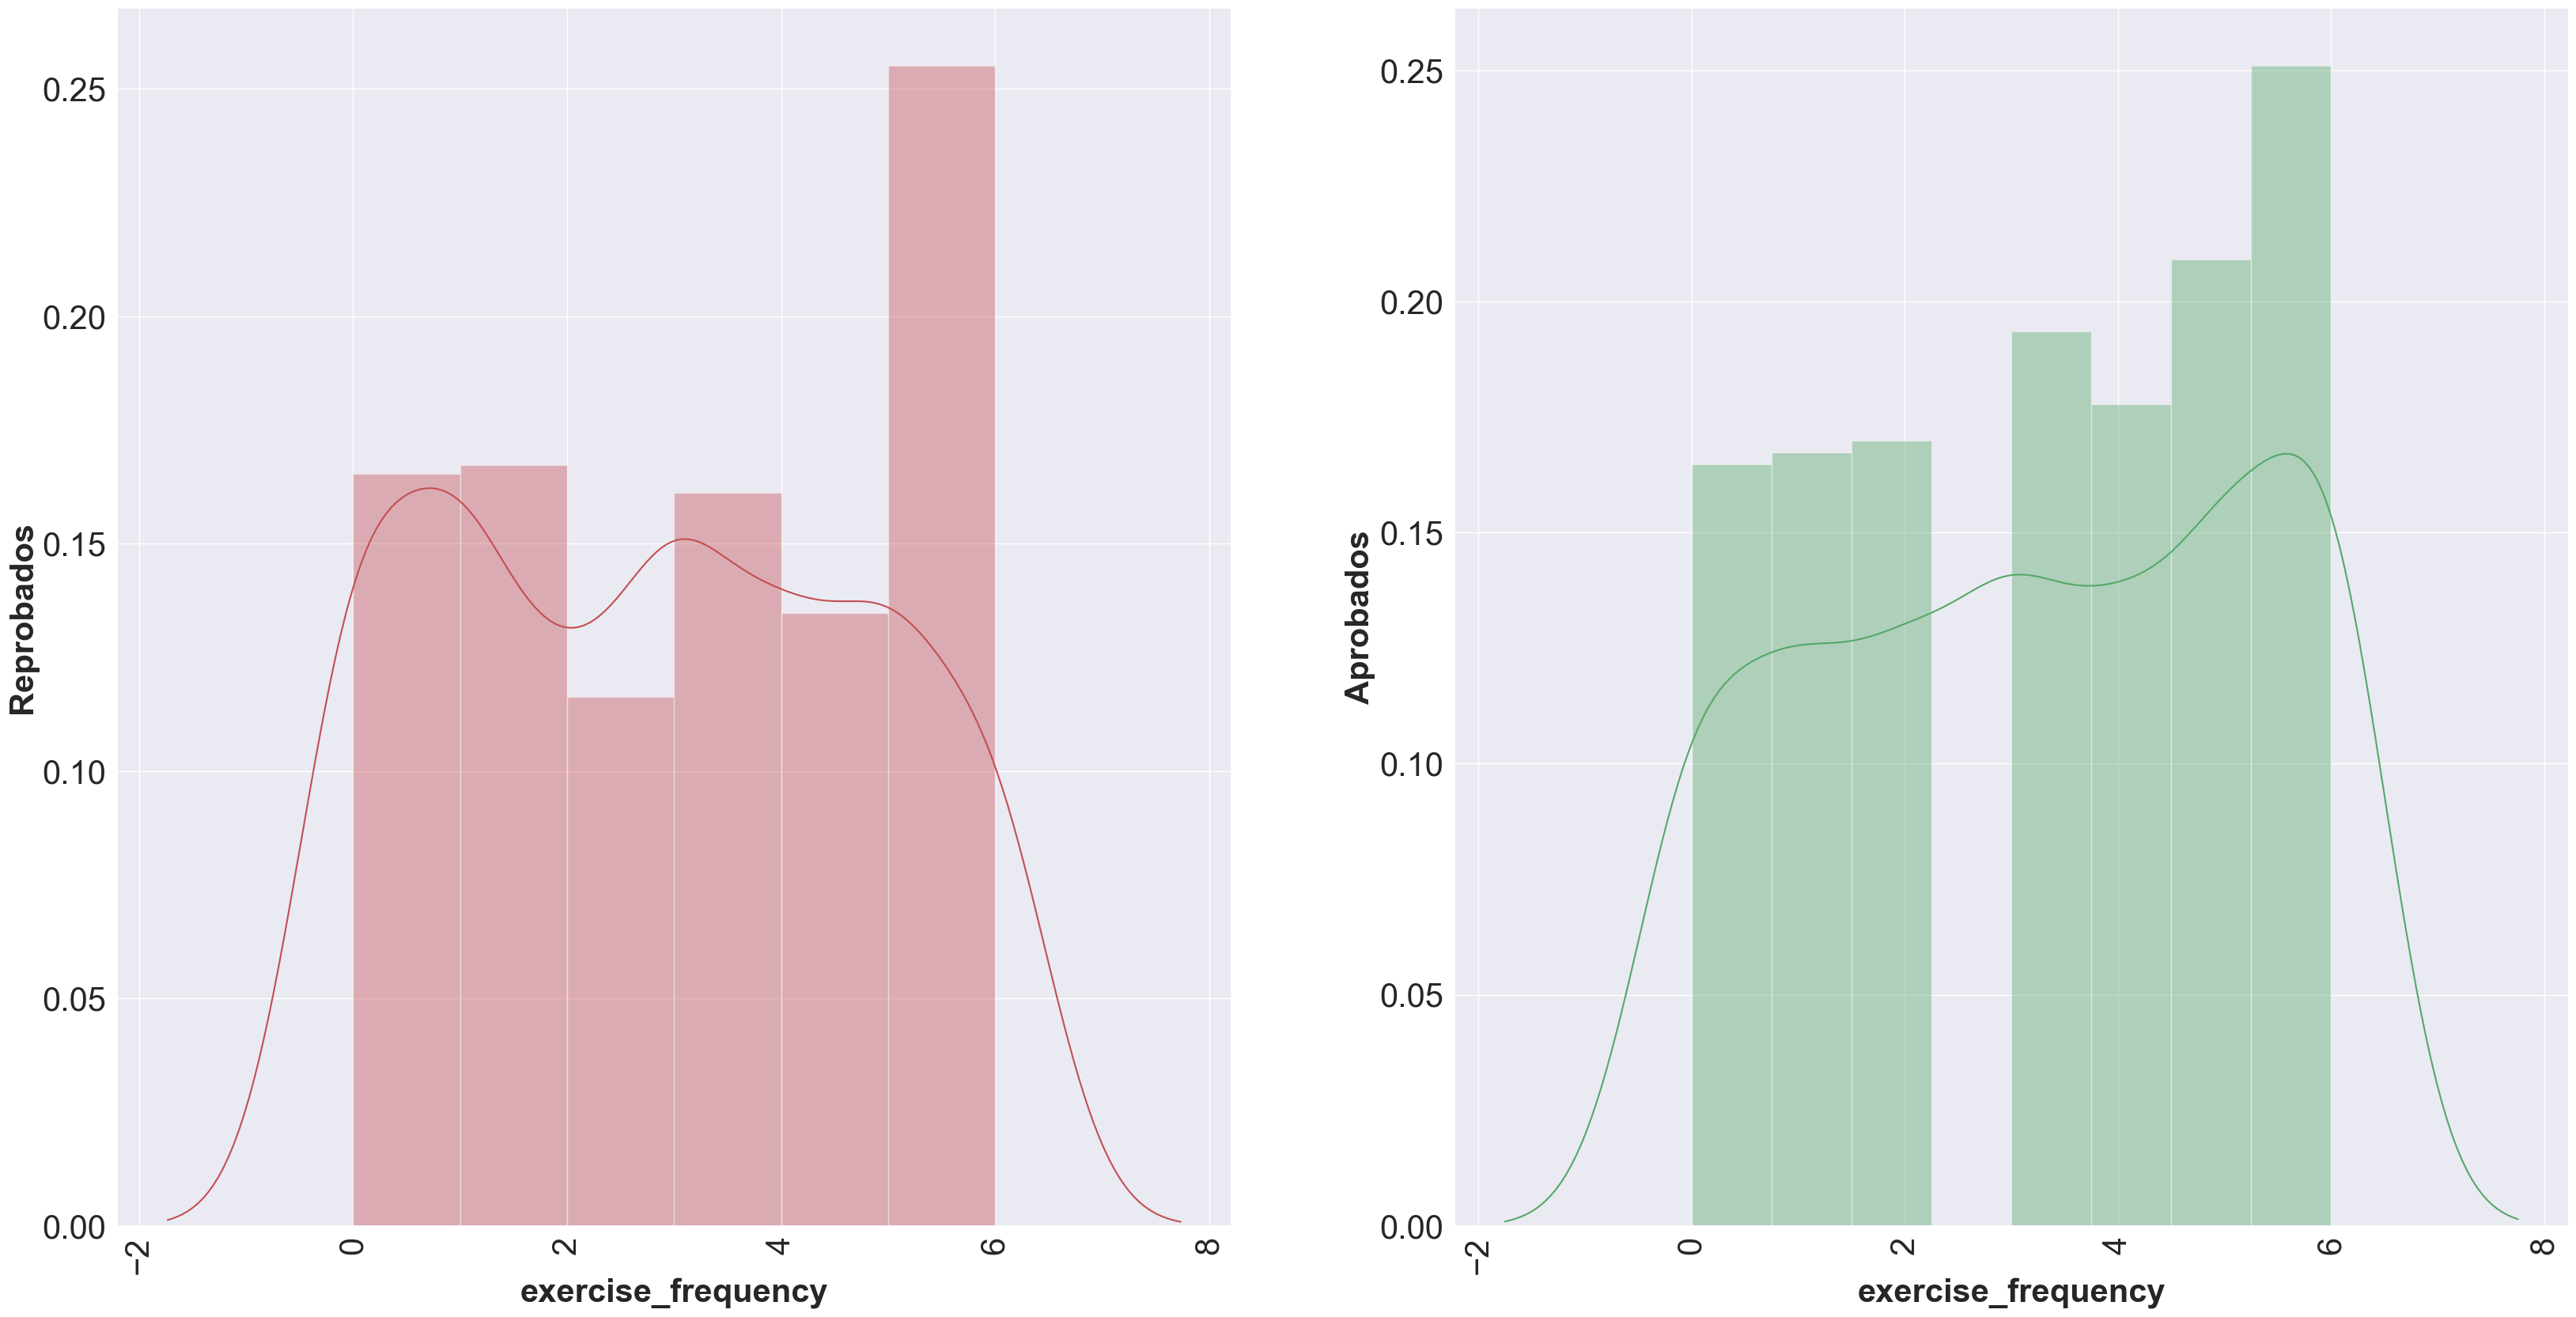

In [261]:
uni(col='exercise_frequency')

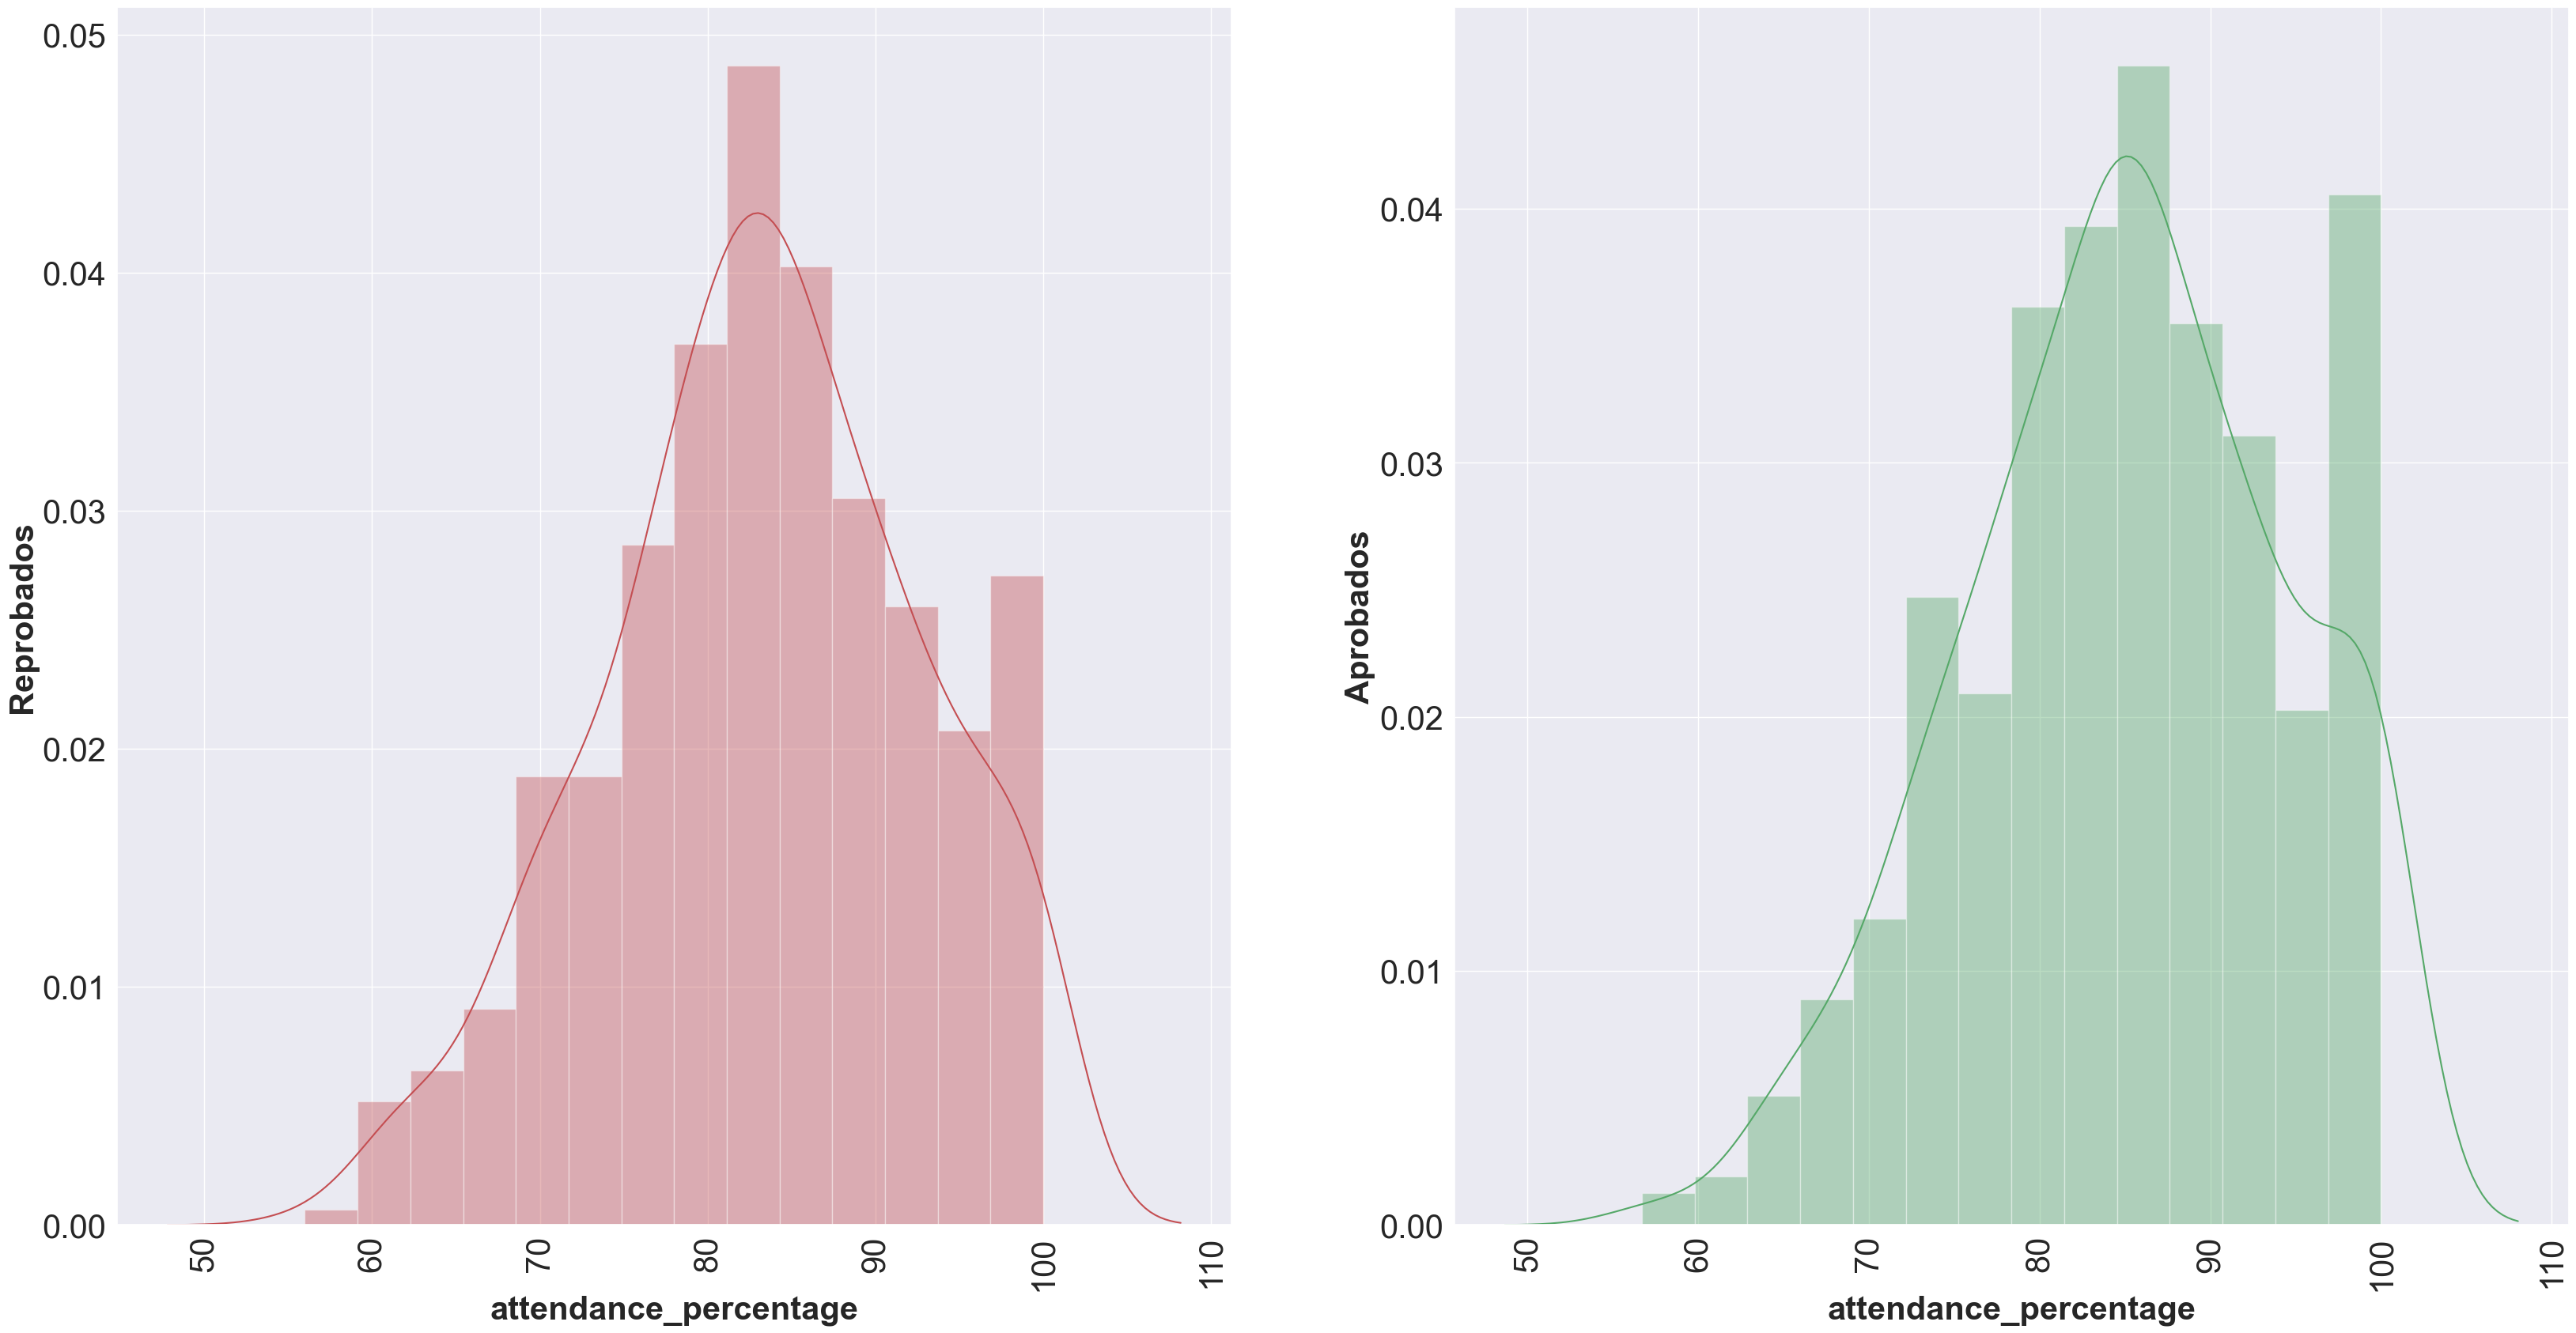

In [262]:
uni(col='attendance_percentage')

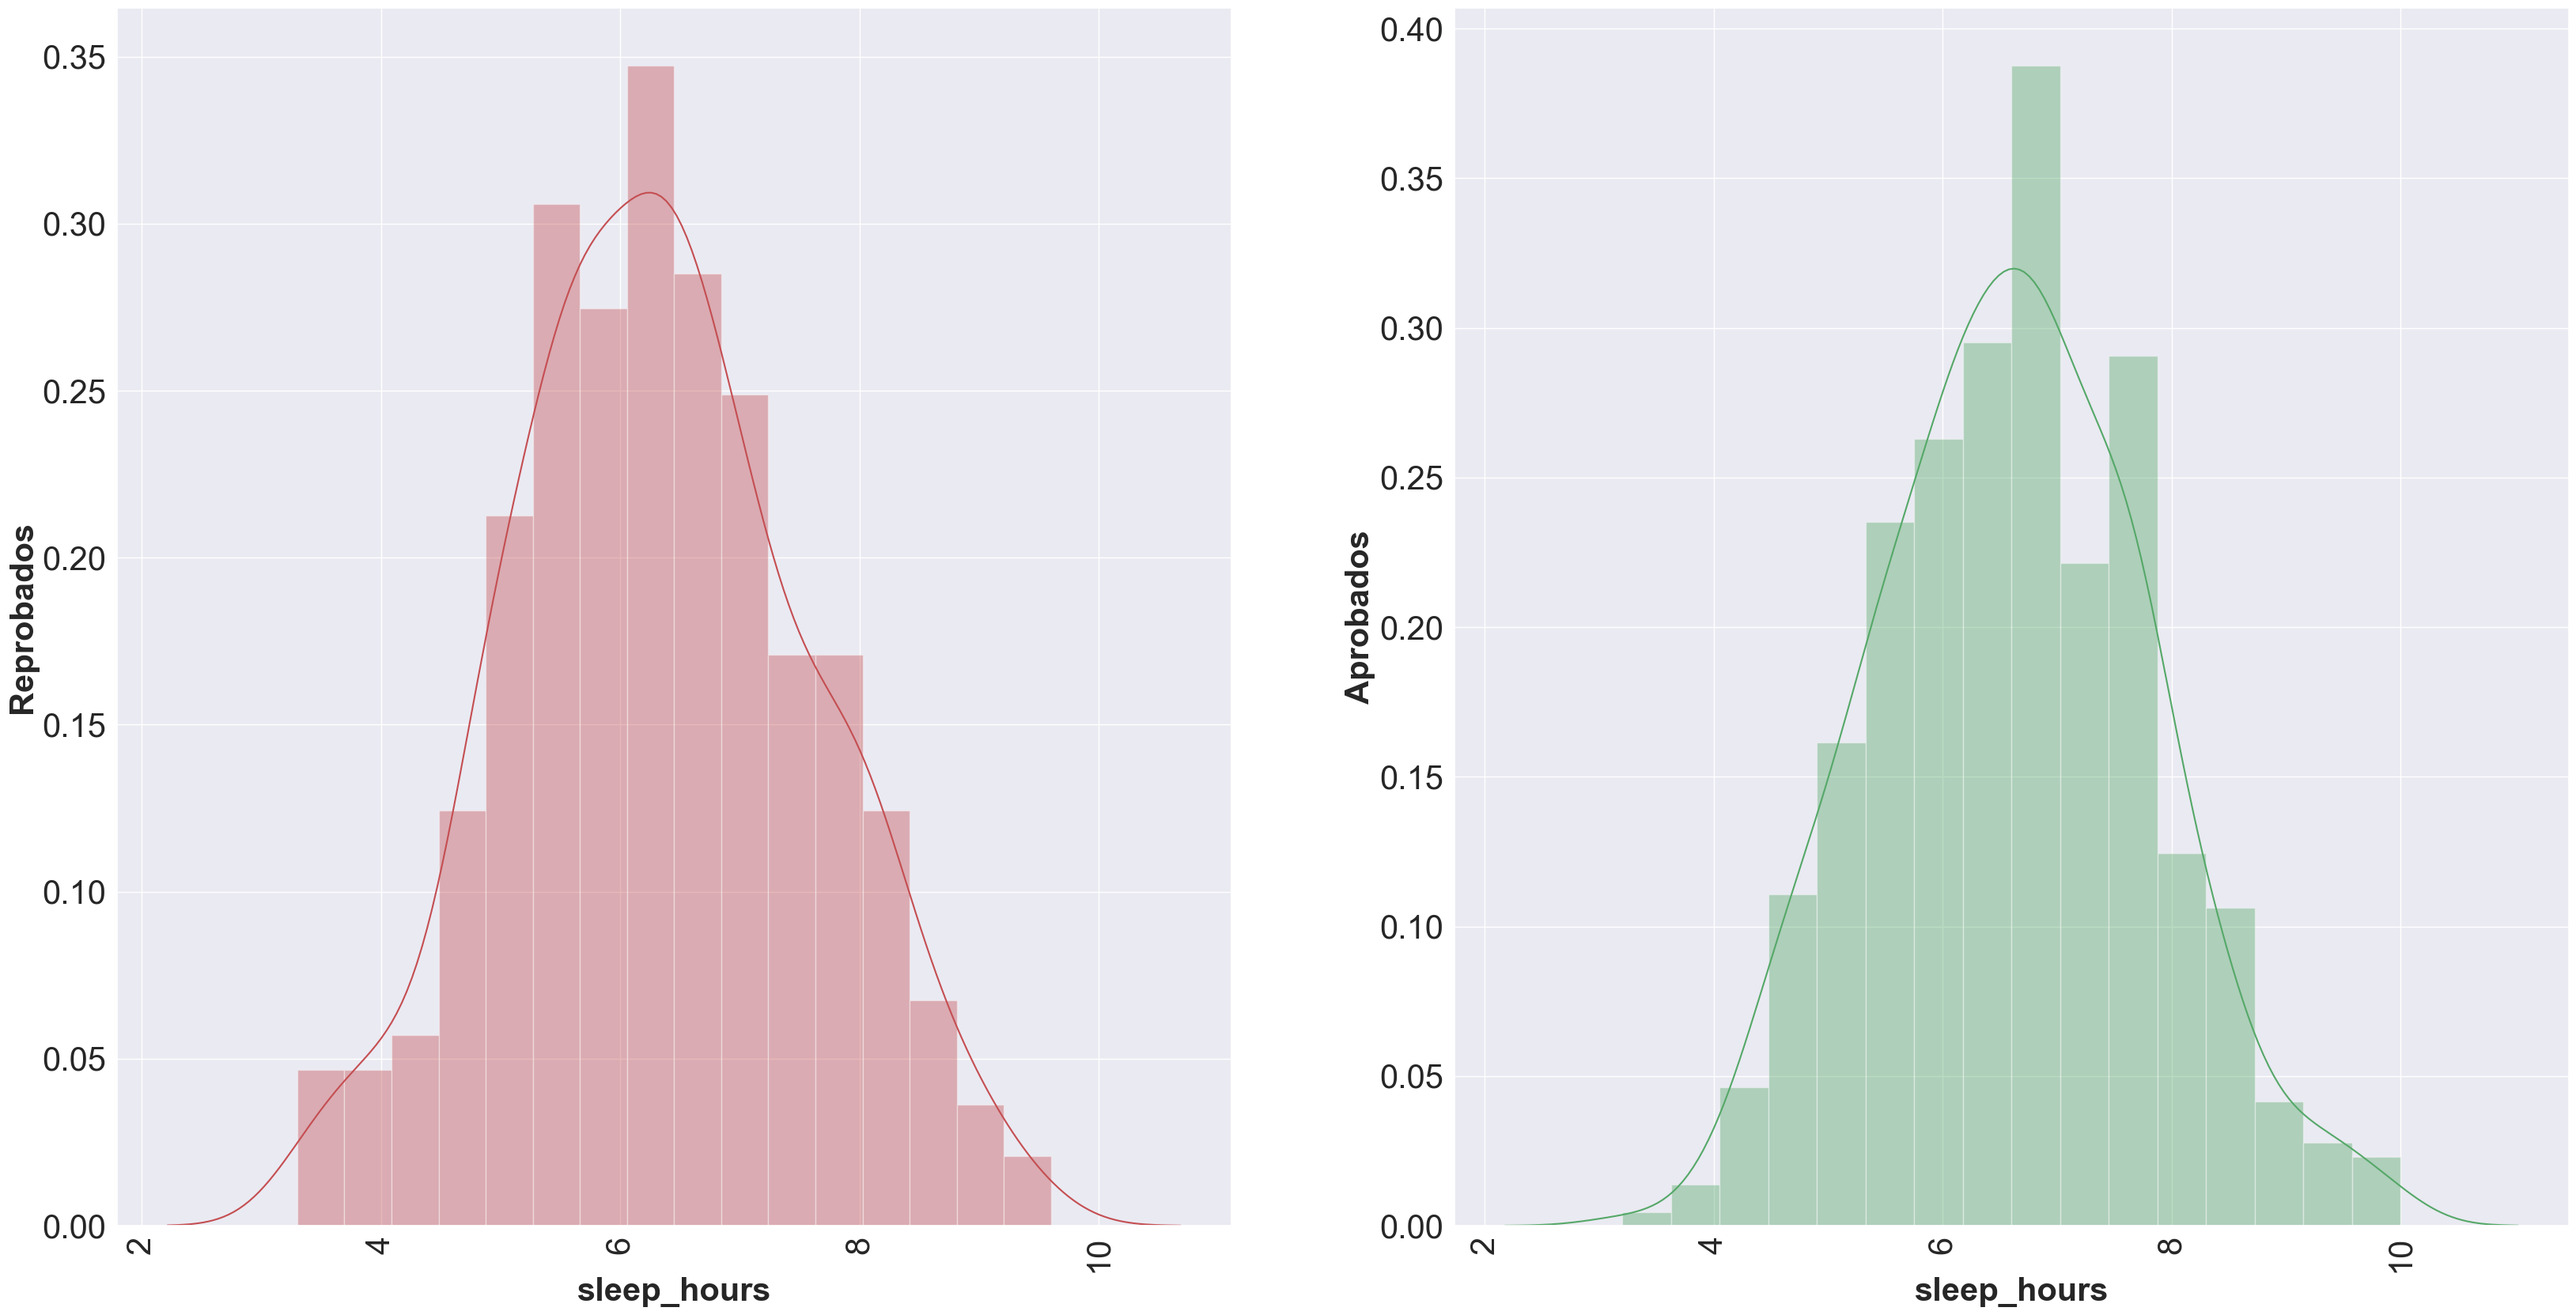

In [263]:
uni(col='sleep_hours')

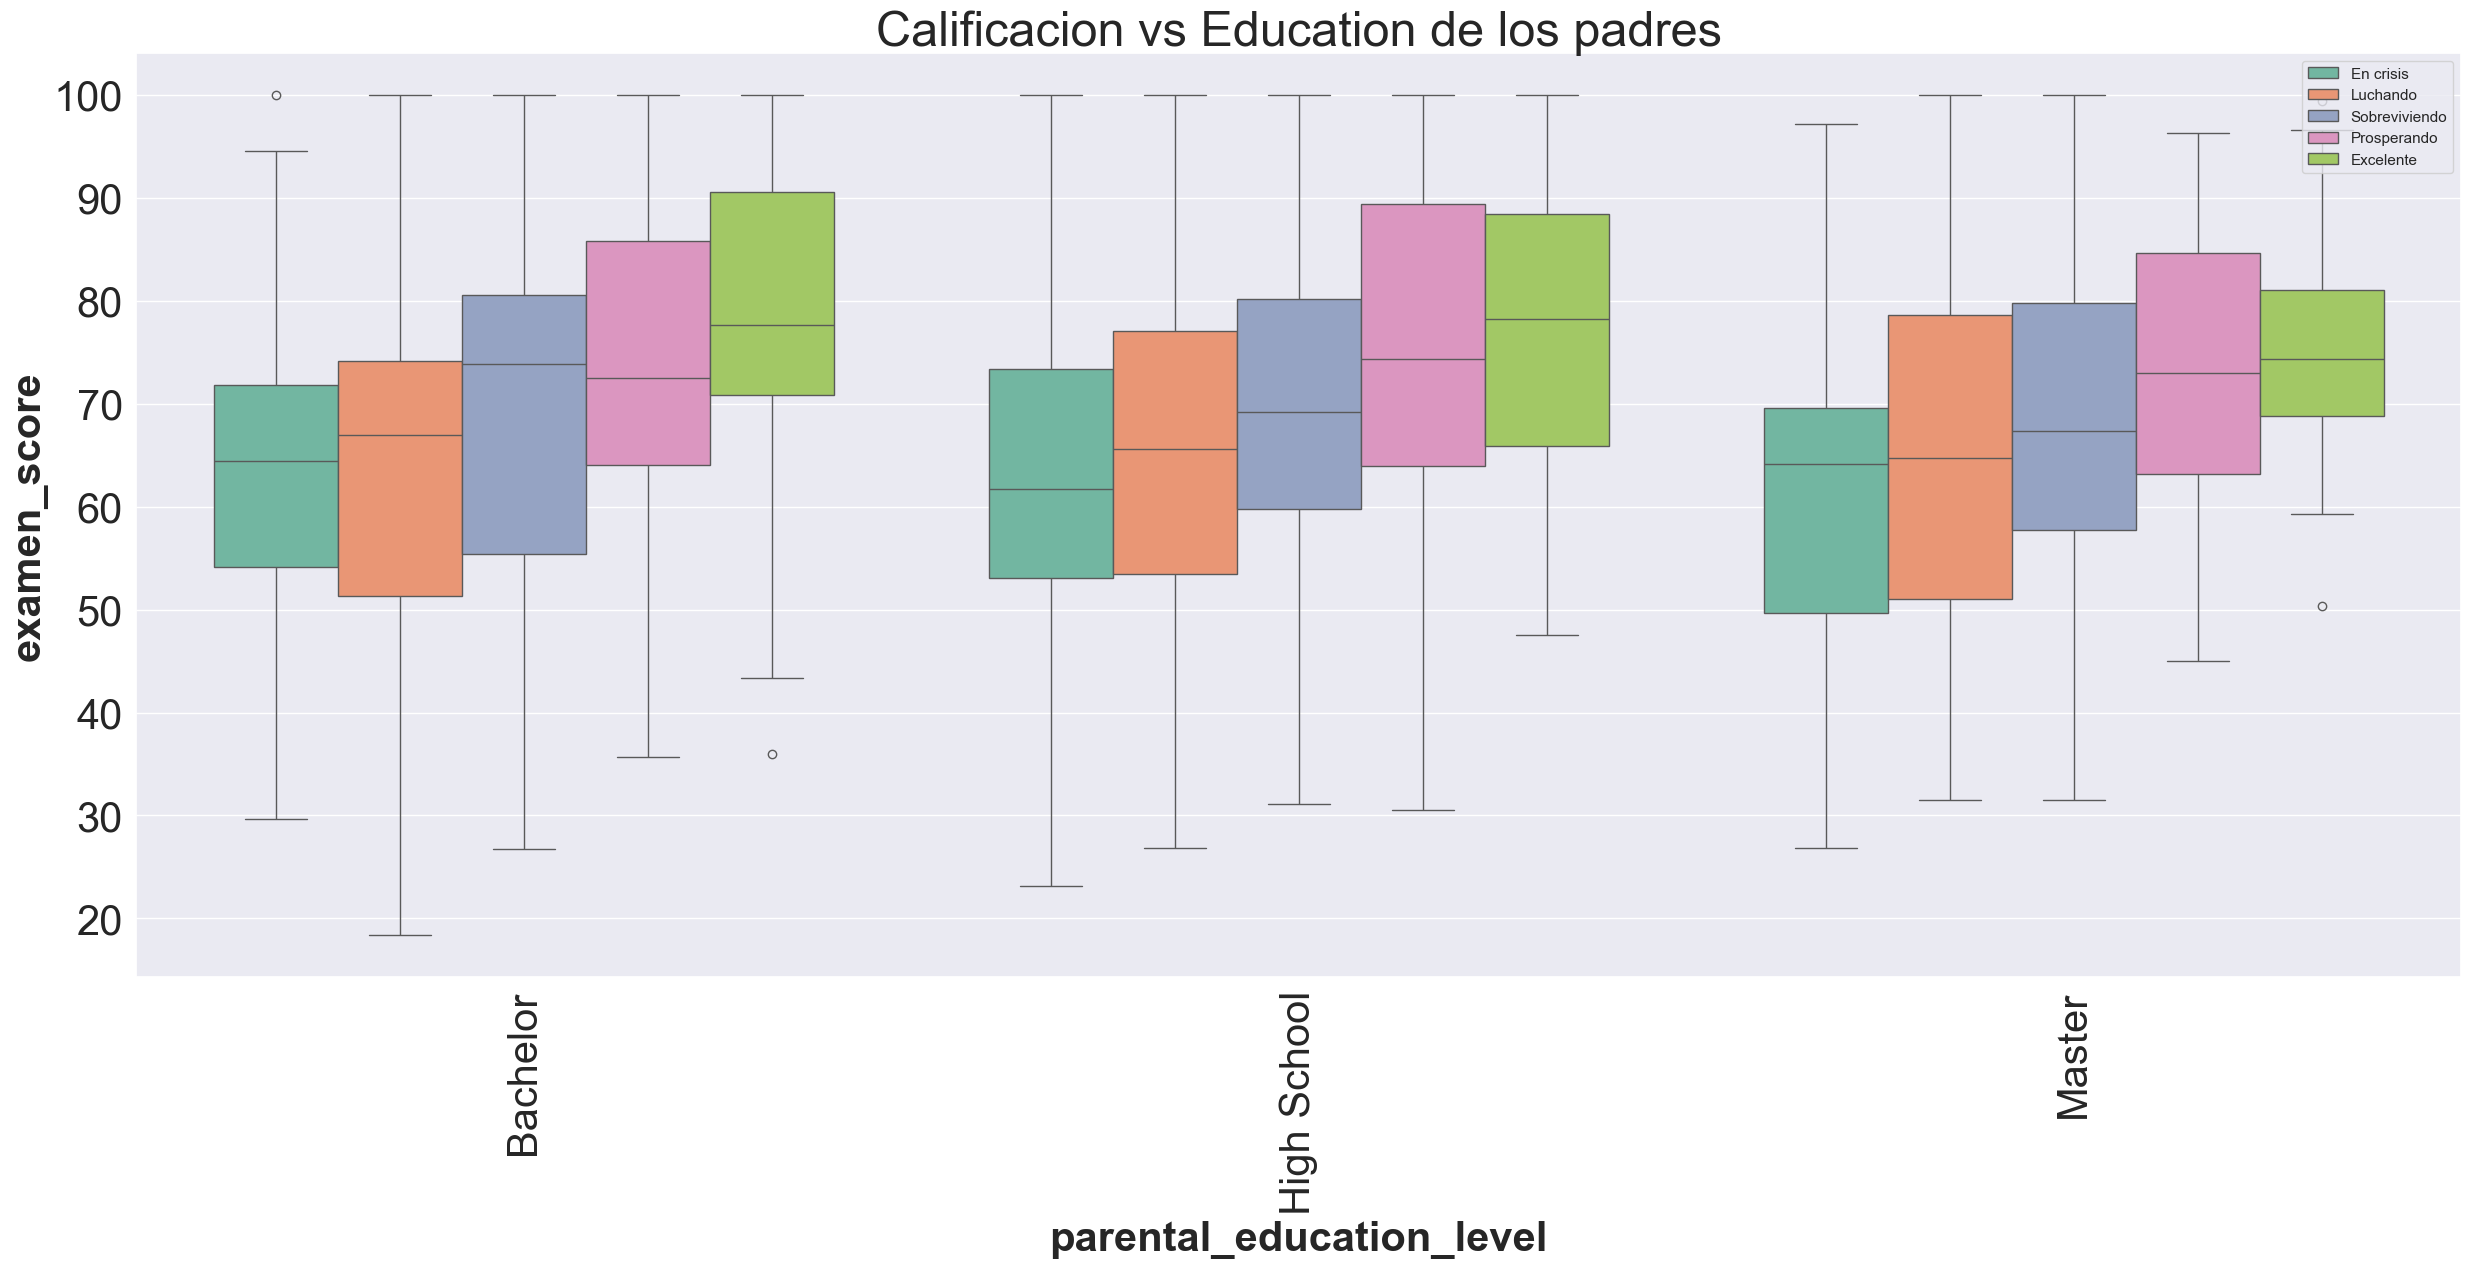

In [264]:
plt.figure(figsize=(30,12)) 
#plt.yscale('log')                     
plt.xticks(rotation = 90)


sns.boxplot(data =df, x='parental_education_level',y='exam_score',   #Boxplot w.r.t Data Target 1
            hue ='mental_health_rating_scale',orient='v',palette='Set2')


plt.legend( loc = 'upper right')                                              #Adjusting legend position
plt.title('Calificacion vs Education de los padres',fontsize= 35)
plt.xlabel("parental_education_level",fontsize= 30, fontweight="bold")
plt.ylabel("examen_score",fontsize= 30, fontweight="bold")
plt.xticks(rotation=90, fontsize=30)
plt.yticks(rotation=360, fontsize=30)

plt.show()

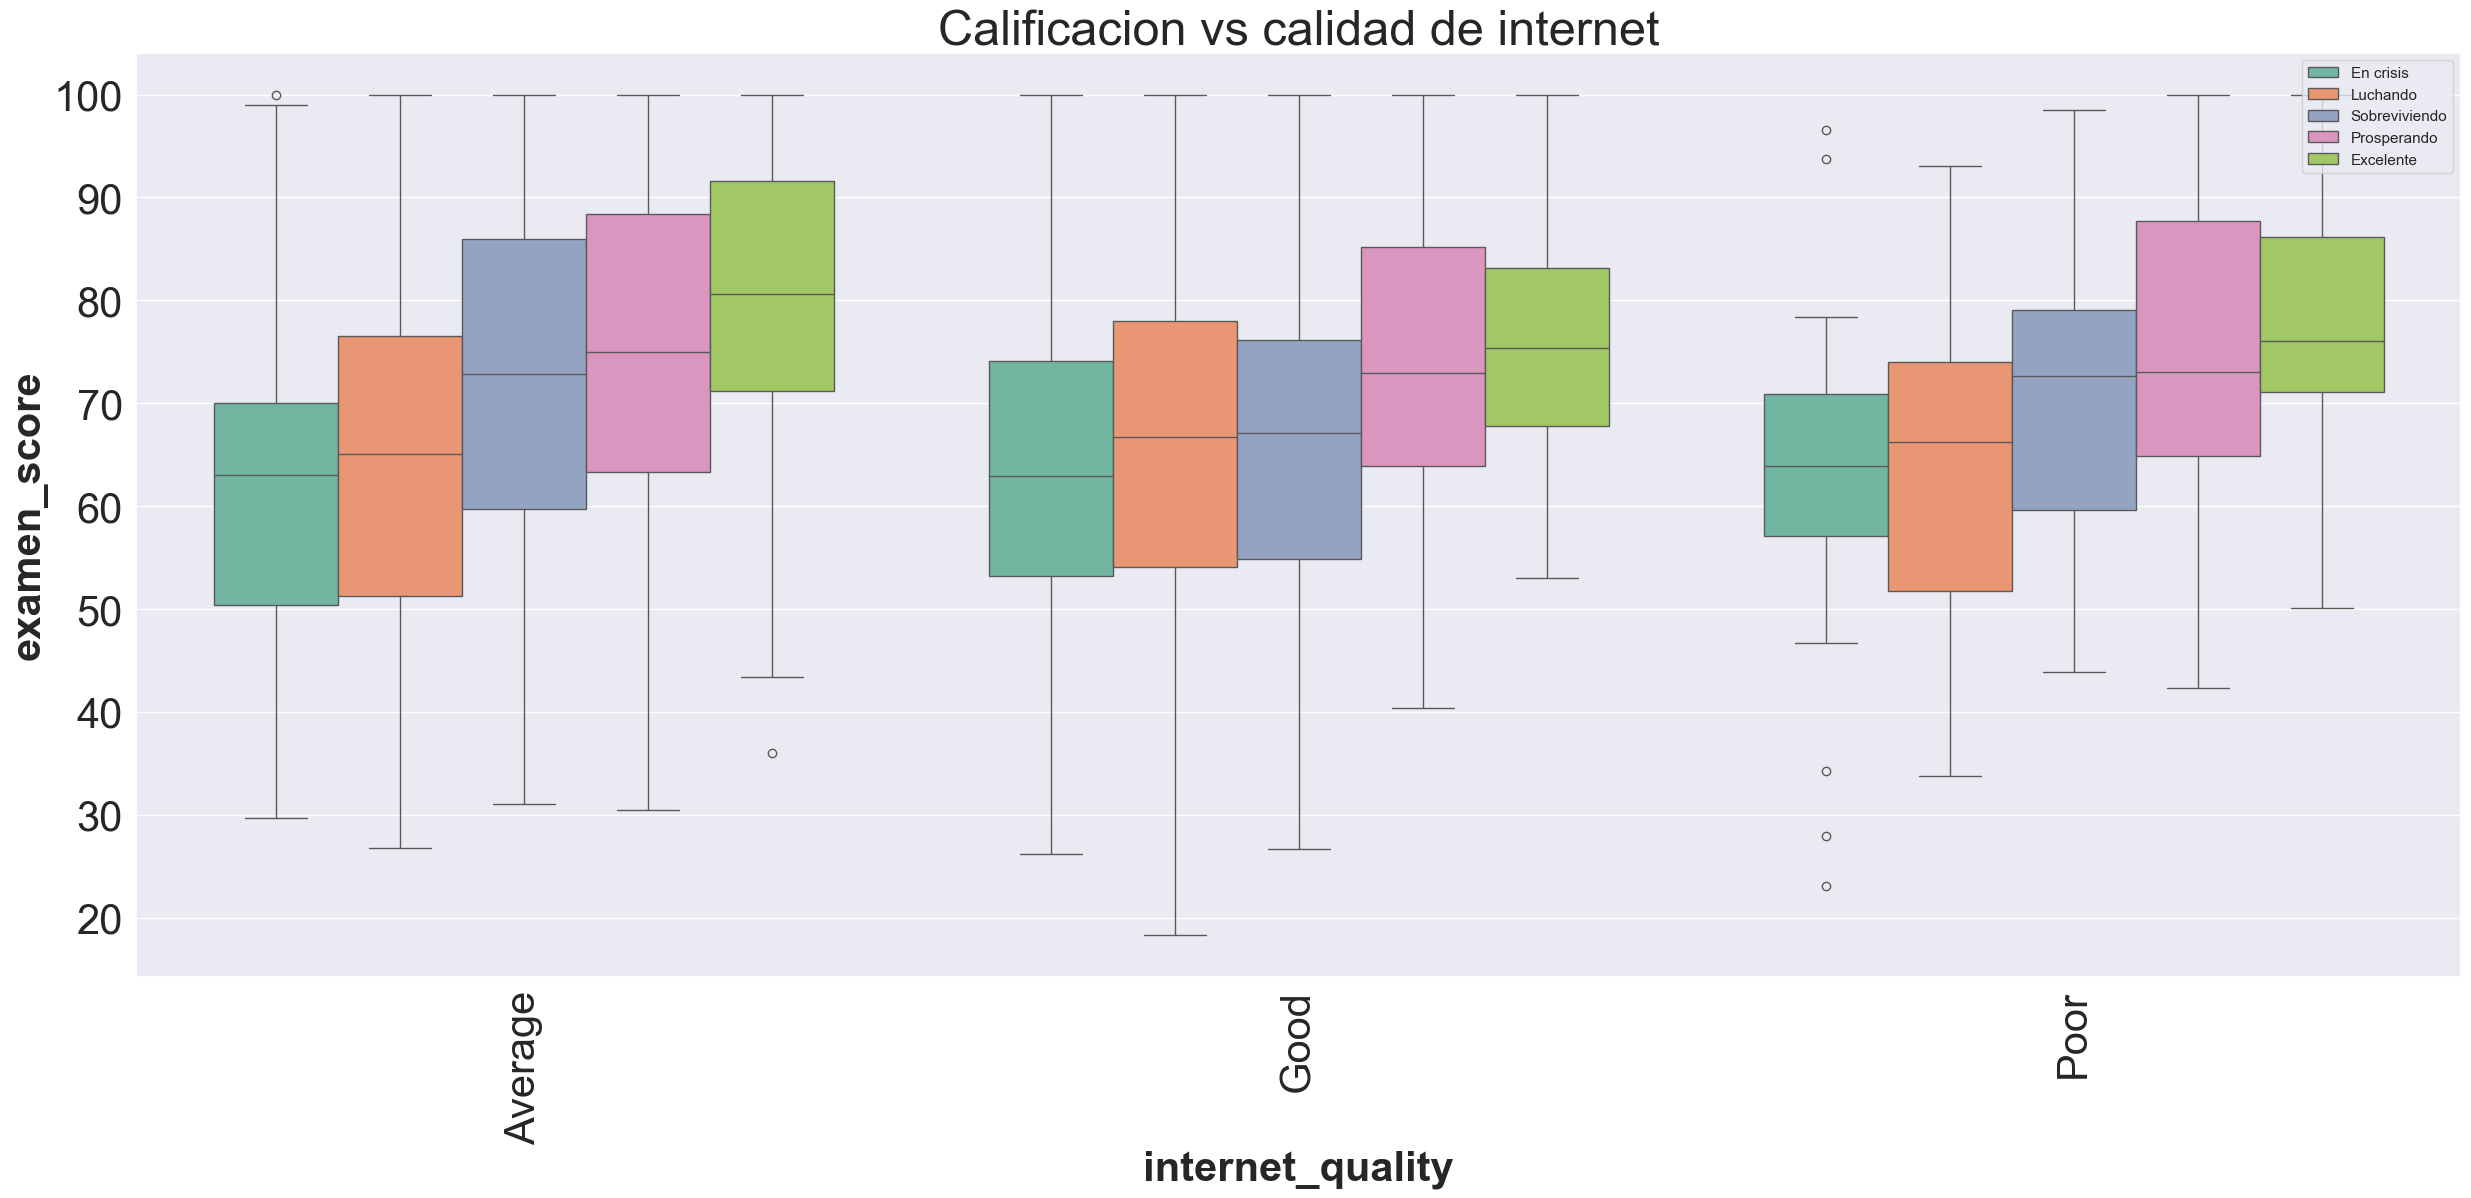

In [265]:
plt.figure(figsize=(30,12)) 
#plt.yscale('log')                     
plt.xticks(rotation = 90)


sns.boxplot(data =df, x='internet_quality',y='exam_score',   #Boxplot w.r.t Data Target 1
            hue ='mental_health_rating_scale',orient='v',palette='Set2')


plt.legend( loc = 'upper right')                                              #Adjusting legend position
plt.title('Calificacion vs calidad de internet',fontsize= 35)
plt.xlabel("internet_quality",fontsize= 30, fontweight="bold")
plt.ylabel("examen_score",fontsize= 30, fontweight="bold")
plt.xticks(rotation=90, fontsize=30)
plt.yticks(rotation=360, fontsize=30)

plt.show()

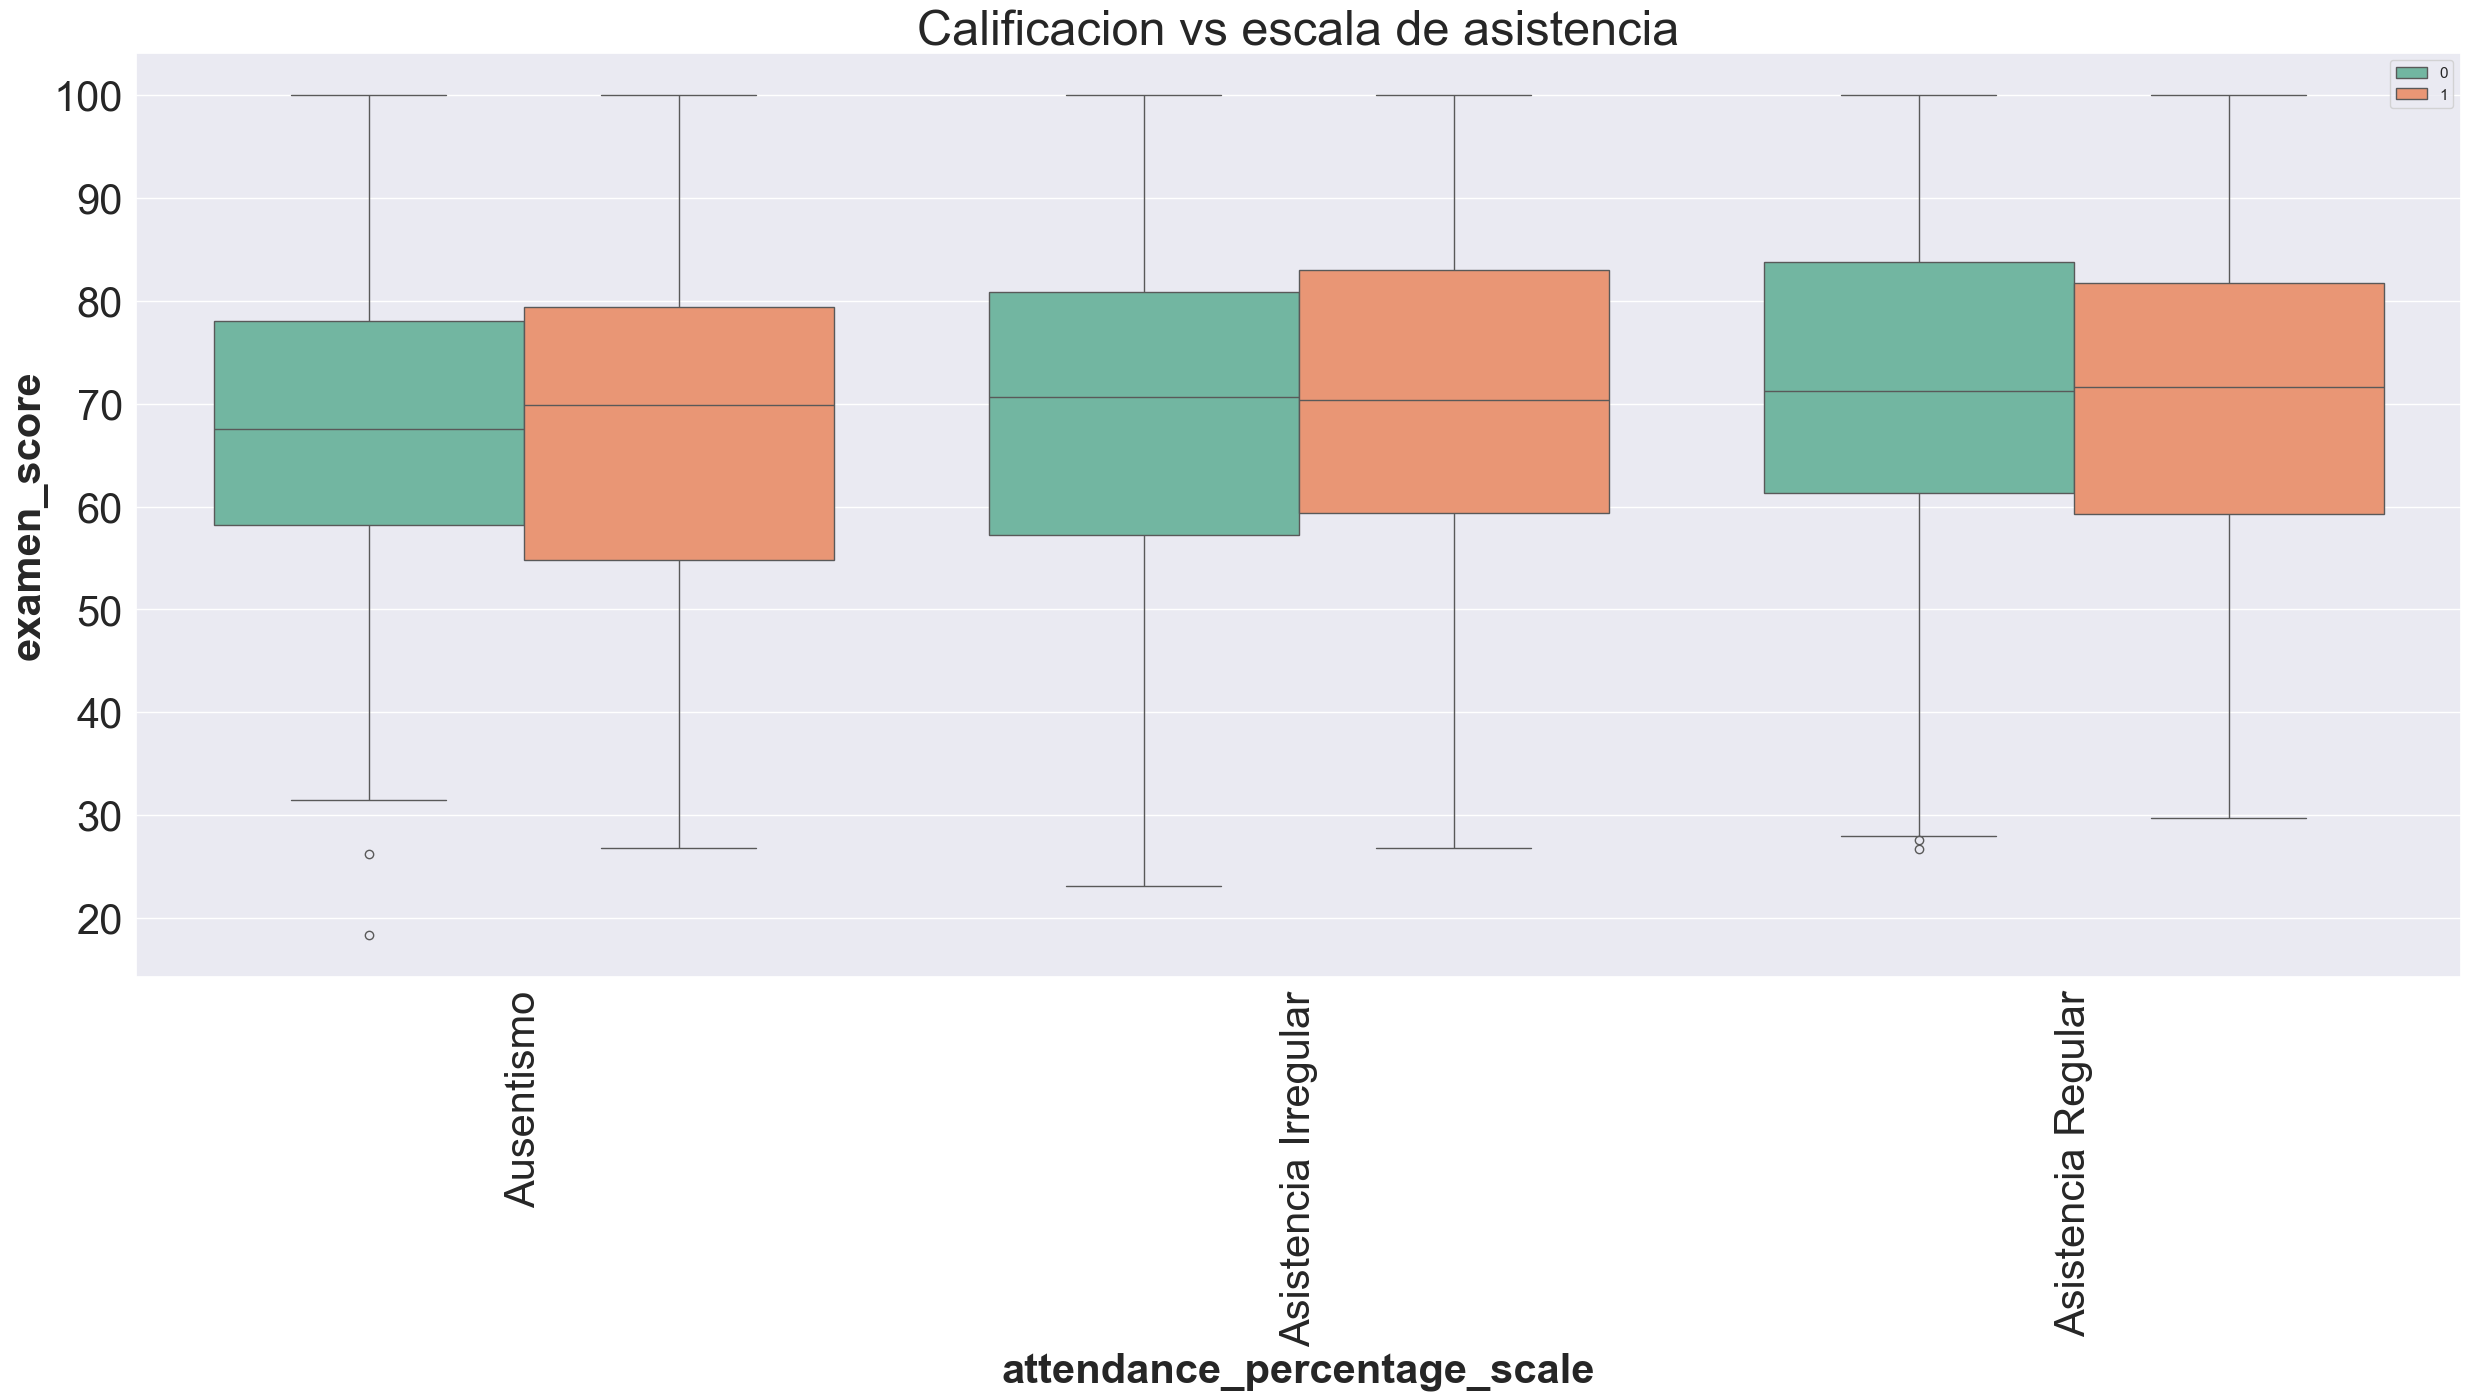

In [266]:
plt.figure(figsize=(30,12)) 
#plt.yscale('log')                     
plt.xticks(rotation = 90)


sns.boxplot(data =df, x='attendance_percentage_scale',y='exam_score',   #Boxplot w.r.t Data Target 1
            hue ='extracurricular_participation',orient='v',palette='Set2')


plt.legend( loc = 'upper right')                                              #Adjusting legend position
plt.title('Calificacion vs escala de asistencia',fontsize= 35)
plt.xlabel("attendance_percentage_scale",fontsize= 30, fontweight="bold")
plt.ylabel("examen_score",fontsize= 30, fontweight="bold")
plt.xticks(rotation=90, fontsize=30)
plt.yticks(rotation=360, fontsize=30)

plt.show()

#### 3.3 ANALISIS

- La mitad de la población estudia menos de 3.50 horas al día
- Part_time_job: la mayoria se ubica en el valor 0 y solo hay unos cuantos atipicos que si trabajan medio tiempo
- El 75% de la población duerme menos de 7.5 horas
- Existe una relación directa entre mas horas de estudio realiza el estudiante mejor calificación obtiene
- Según el diagrama de dispersión se denota que hay una gran concentración de la población que saca mejor resultado entre menos horas de netflix consume.
- Con el diagrama de calor confirmamos la relación entre horas de estudio mejor calificacion y tambien la leve relacion inversa entre la calificacion y las horas en redes sociales y netflix
- Al separar los datos en dos conjuntos Aprobados(exam_score>7) y Reprobados no existe algún sesgo o tendencia con relación a exercise_frequency, attendance_percentage, sleep_hours en cada grupo.
- Los Reprobados comprenden el 49% y los Aprobados el 51% de la población
- No se visualiza una relación entre la calificación del exámen y la educación de los padres, pero si se denota que a mejor salud mental hay mejor promedio de rendimiento
- Los valores promedios de las calificaciones mantienen la relación con la salud mental a pesar de la calidad del internet, es decir la calidad del internet no influye.
- Por otro lado la asistencia regular indica una leve mejora en la calificación promedio pero no significativa. solo un 25% de los que cumple con asistencia regular está por debajo de un 6 de calificación y el 75% tiene una calificación por arriba del 6.
- La mitad de la población con asistencia irregular y asistencia regular tiene una calificación arriba de 7(target de aprobados)

### Conclusiones
- Los estudiantes que tienen a estudiar más horas al día logran aprobar el exámen
- Los estudiantes que consumen menos Netflix o redes sociales en su mayoria obtienen mejores calificaciones
- A mejor salud mental la calificación tiende a mejorar